In [63]:
# Step 1: Import libraries and load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load dataset (assuming it's the Housing dataset)

df = pd.read_csv('/content/Housing.csv')

# Step 1: Preprocess the dataset(As data doesnt contain null values we dont need to remove any values)
# Convert categorical variables to numeric (get_dummies)
df = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df.drop('price', axis=1)
y = df['price']

# Step 2: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)#0.6 is least split where the error is minimized

# Step 3: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Fit Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Step 5: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2


(863353.9295425973, 1304336768978.3323, 0.6484297231224077)

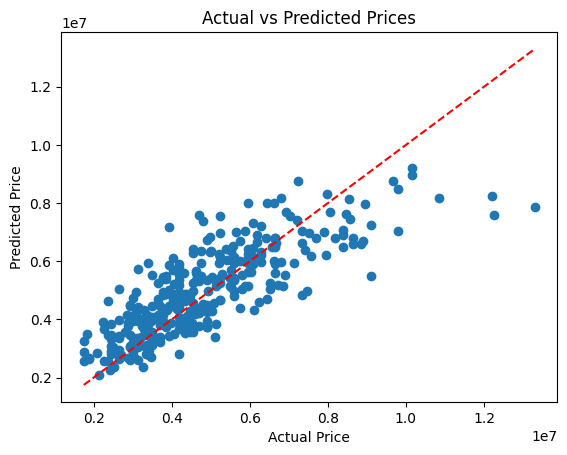

In [64]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()


In [65]:
pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)


,Feature,Coefficient
0,area,542413.504100
2,bathrooms,415521.254220
9,airconditioning_yes,326038.603849
3,stories,266087.035842
4,parking,248763.785940
8,hotwaterheating_yes,198606.662176
7,basement_yes,183191.362601
6,guestroom_yes,167165.788829
1,bedrooms,156087.734081
5,mainroad_yes,148385.984280
